In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [3]:
df=pd.read_csv('bank-full.csv',delimiter=';')

In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## EDA tried to find different column's relation with y

In [6]:
df.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


In [70]:
df.describe()

,age,balance,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y_yes
count,45158.000000,45158.000000,45158.000000,45158.000000,45158.000000,45158.000000,45158.000000,45158.000000,45158.000000,45158.000000,...,45158.000000,45158.000000,45158.000000,45158.000000,45158.000000,45158.000000,45158.000000,45158.000000,45158.000000,45158.000000
mean,40.925174,1309.319678,258.136432,2.763674,40.199012,0.574494,0.114420,0.215466,0.032796,0.027437,...,0.293791,0.041078,0.018048,0.556225,0.160370,0.108464,0.040679,0.033416,0.817441,0.116923
std,10.612066,2555.212339,257.473417,3.096137,100.120887,1.908467,0.318325,0.411150,0.178104,0.163355,...,0.455502,0.198473,0.133126,0.496834,0.366953,0.310968,0.197549,0.179722,0.386309,0.321332
min,18.000000,-8019.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,72.000000,103.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,39.000000,447.000000,180.000000,2.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,48.000000,1419.750000,319.000000,3.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,95.000000,29941.000000,4918.000000,63.000000,871.000000,58.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
df[df['education']=='unknown']['y'].value_counts()

no     1605
yes     252
Name: y, dtype: int64

In [8]:
df[df['campaign']==21]['y'].value_counts()
#df['campaign'].value_counts()

no     34
yes     1
Name: y, dtype: int64

In [9]:
df[df['poutcome']=='failure']['y'].value_counts()

no     4283
yes     618
Name: y, dtype: int64

In [10]:
df[df['marital']=='divorced']['y'].value_counts()

no     4585
yes     622
Name: y, dtype: int64

In [11]:
df[df['age']==70]['y'].value_counts()

no     50
yes    17
Name: y, dtype: int64

In [12]:
df[df['job']=='services']['y'].value_counts()

no     3785
yes     369
Name: y, dtype: int64

In [13]:
df['duration'].value_counts(ascending=True)

1556      1
1107      1
1739      1
1488      1
1536      1
       ... 
114     175
104     175
89      177
90      184
124     188
Name: duration, Length: 1573, dtype: int64

In [14]:
df[df['duration']==1488]['y'].value_counts()

yes    1
Name: y, dtype: int64

In [15]:
for i in df['month'].unique():
    print(i)

may
jun
jul
aug
oct
nov
dec
jan
feb
mar
apr
sep


In [16]:
for i in df['month'].unique():
    print(i,df[df['month']==i]['y'].value_counts())

may no     12841
yes      925
Name: y, dtype: int64
jun no     4795
yes     546
Name: y, dtype: int64
jul no     6268
yes     627
Name: y, dtype: int64
aug no     5559
yes     688
Name: y, dtype: int64
oct no     415
yes    323
Name: y, dtype: int64
nov no     3567
yes     403
Name: y, dtype: int64
dec no     114
yes    100
Name: y, dtype: int64
jan no     1261
yes     142
Name: y, dtype: int64
feb no     2208
yes     441
Name: y, dtype: int64
mar yes    248
no     229
Name: y, dtype: int64
apr no     2355
yes     577
Name: y, dtype: int64
sep no     310
yes    269
Name: y, dtype: int64


## Pandas profiling to find correlations and to visualize data

In [18]:
raw_df=pd.read_csv('bank-full.csv',delimiter=';')

In [19]:
from pandas_profiling import ProfileReport
prof = ProfileReport(raw_df)
prof.to_file(output_file='rawDataoutput.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Dropped unneccesary columns and rows after analyzing

In [21]:
df=df.drop(['contact','day','month'],axis=1)

In [22]:
df

,age,job,marital,education,default,balance,housing,loan,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,508,4,-1,0,unknown,no


In [23]:
df=df.drop(df[df['previous']>100].index)

In [24]:
df=df.drop(df[df['balance']>30000].index)

## Converted columns into Binary

In [25]:
df=pd.get_dummies(df,columns=['job','marital','education','default','housing','loan','poutcome','y'])

In [26]:
df=df.drop(['housing_no','loan_no','y_no','default_no'],axis=1)

In [55]:
df

,age,balance,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y_yes
0,58,2143,261,1,-1,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1,44,29,151,1,-1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,33,2,76,1,-1,0,0,0,1,0,...,0,0,0,1,1,0,0,0,1,0
3,47,1506,92,1,-1,0,0,1,0,0,...,0,1,0,1,0,0,0,0,1,0
4,33,1,198,1,-1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,977,3,-1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,1
45207,71,1729,456,2,-1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
45208,72,5715,1127,5,184,3,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
45209,57,668,508,4,-1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


## Boxplot for understanding dataframe and normalization

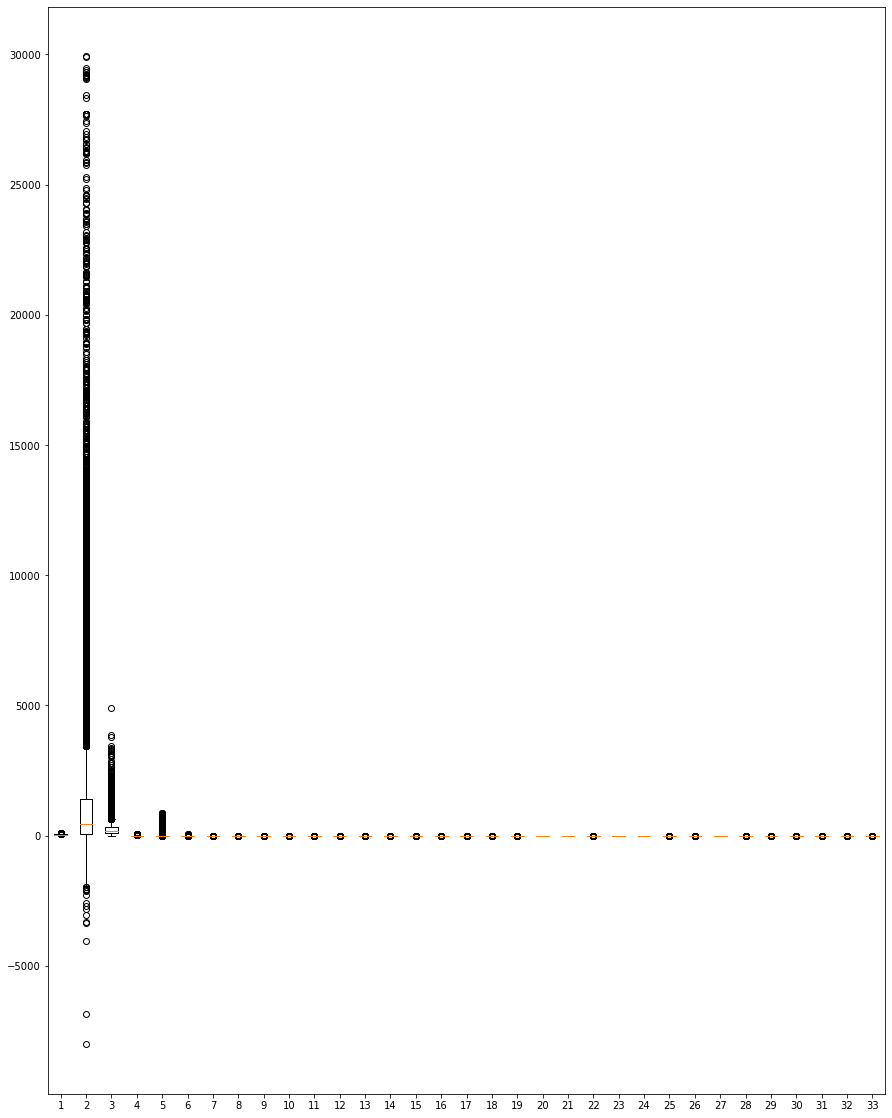

In [69]:
plt.figure(figsize=(15,20))
plt.boxplot(df)
plt.show()

## Train test split and model fitting

In [29]:
xTrain,xTest,yTrain,yTest=train_test_split(df.drop('y_yes',axis=1),df.y_yes,random_state=12)

In [30]:
model=LogisticRegression().fit(xTrain,yTrain)

/home/vikrant/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [31]:
model.score(xTest,yTest)

0.8968113374667848

In [63]:
model.coef_[0]

array([-1.46610274e-02,  2.66538808e-05,  3.98539127e-03, -1.31681680e-01,
        8.00315359e-04,  4.56032128e-02, -3.98364103e-02, -4.91370695e-01,
       -5.26884990e-02, -1.48868725e-02, -2.50544770e-02,  3.39274538e-01,
       -4.76987440e-02, -1.78910371e-01,  5.20566713e-02, -1.54203903e-01,
        1.48195417e-02,  4.98068672e-03,  3.00552543e-02, -3.49569937e-01,
       -2.74003850e-01, -1.34925031e-01, -5.13332339e-01,  2.44349870e-02,
        3.03038506e-02, -2.98249072e-02, -1.32575041e+00, -3.75759507e-01,
       -2.70093010e-01, -6.63046815e-02,  6.37945740e-01, -8.95066581e-01])

### Coefficient plot to understand dominant columns

<BarContainer object of 32 artists>

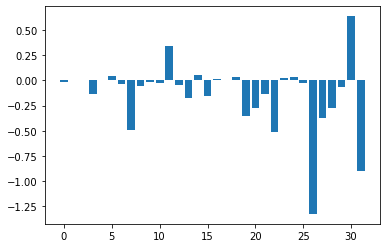

In [54]:
plt.bar(range(len(model.coef_[0])),model.coef_[0])

In [61]:
df.iloc[:,26:27].head()

,housing_yes
0,1
1,1
2,1
3,1
4,0


In [72]:
df.iloc[:,30:32]

,poutcome_success,poutcome_unknown
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
45206,0,1
45207,0,1
45208,1,0
45209,0,1
